In [ ]:
# step 1 : Importing packages.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2  # OpenCV for image loading
import numpy as np




In [ ]:
#step 2 : uploading training dataset and test dataset.

# Paths to your train dataset folders
me_dir = '/content/drive/MyDrive/dataset/image identification/datasets/train_me/me'
not_me_dir = '/content/drive/MyDrive/dataset/image identification/datasets/train_me/not me'

# Lists to hold images and labels
images = []
labels = []

# Load "Me" images (label = 1)
for filename in os.listdir(me_dir):
    img_path = os.path.join(me_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))  # Resize to the desired size
    images.append(img)
    labels.append(1)  # Label for "Me"


# Load "Not Me" images (label = 0)
for filename in os.listdir(not_me_dir):
    img_path = os.path.join(not_me_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))  # Resize to the desired size
    images.append(img)
    labels.append(0)  # Label for "Not Me"

# Convert lists to NumPy arrays
train_set_x_orig = np.array(images)
train_set_y = np.array(labels)

# Print shapes
print("Training images shape:", train_set_x_orig.shape)
print("Training labels shape:", train_set_y.shape)
print("Unique labels:", np.unique(train_set_y))





Training images shape: (299, 64, 64, 3)
Training labels shape: (299,)
Unique labels: [0 1]


In [ ]:
# Paths to your test dataset folders
me_dir = '/content/drive/MyDrive/dataset/image identification/datasets/test_me/me'
not_me_dir = '/content/drive/MyDrive/dataset/image identification/datasets/test_me/not me'

# Lists to hold images and labels
images_test = []
labels = []

# Load "Me" images (label = 1)
for filename in os.listdir(me_dir):
    img_path = os.path.join(me_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))  # Resize to the desired size
    images_test.append(img)
    labels.append(1)  # Label for "Me"


# Load "Not Me" images (label = 0)
for filename in os.listdir(not_me_dir):
    img_path = os.path.join(not_me_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64))  # Resize to the desired size
    images_test.append(img)
    labels.append(0)  # Label for "Not Me"

# Convert lists to NumPy arrays
test_set_x_orig = np.array(images_test)
test_set_y = np.array(labels)

# Print shapes
print("Test images shape:", test_set_x_orig.shape)
print("Test labels shape:", test_set_y.shape)
print("Unique labels:", np.unique(test_set_y))

Test images shape: (178, 64, 64, 3)
Test labels shape: (178,)
Unique labels: [0 1]


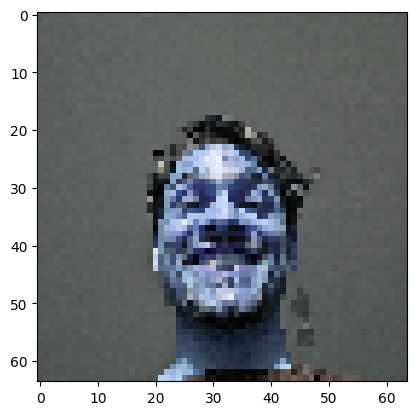

In [ ]:
#step 2.1 : show the data.
# Example of a picture
index = 15

plt.imshow(train_set_x_orig[index])



In [ ]:
# Step 3: Reshape(Flattening) the training and test examples

train_set_x_flatten =np.transpose( train_set_x_orig.reshape(train_set_x_orig.shape[0], -1))
test_set_x_flatten = np.transpose( test_set_x_orig.reshape(test_set_x_orig.shape[0], -1))

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 299)
train_set_y shape: (299,)
test_set_x_flatten shape: (12288, 178)
test_set_y shape: (178,)


In [ ]:
#Step 4: Normalizing the dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
# Step 5: Building Logistic_Regression_with_a_Neural_Network

# Step 5.1: Helper functions_ sigmoid
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# Step 5.2: Initializing parameters
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b= 0.0
    return w, b

# Step 5.3: Forward and Backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Step 5.3.1: FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(np.transpose(w),X)+ b)
    cost = np.sum(Y*np.log(A)+ (1-Y)*np.log(1-A))/-m

    # Step 5.3.2: BACKWARD PROPAGATION (TO FIND GRAD)
    dw = X @ (A - Y).T / m
    db = np.sum(A-Y)/m

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    return grads, cost



In [ ]:
# Step 6: Optimize
import copy
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):


    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):

        # Step 6.1: Cost and gradient calculation

        grads, cost = propagate(w, b, X, Y)


        # Step 6.2: Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Step 6.3: Update the parameter

        w = w - learning_rate * dw

        b = b- learning_rate * db



        # Step 6.4: Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
# Step 7: Predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
   '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a me being present in the picture
    #(≈ 1 line of code)
    A = sigmoid(np.dot(np.transpose(w),X)+ b)

    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

    return Y_prediction

In [ ]:
# Step 8: Model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function  implemented previously

    """

    # Step 8.1: initialize parameters with zeros
    w, b = initialize_with_zeros(dim=X_train.shape[0])


    # Step 8.2: Gradient descent
    params, grads, costs = optimize(w,b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)

    #  Step 8.3: Retrieve parameters w and b from dictionary "params"
    w = params['w']
    b = params['b']

    #  Step 8.4: Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    #  Step 8.5: Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [ ]:

# Step 9: Train your model.
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

train accuracy: 99.66555183946488 %
test accuracy: 53.93258426966292 %


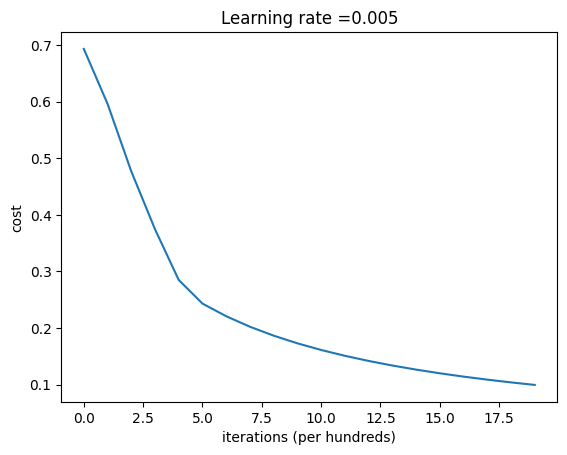

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



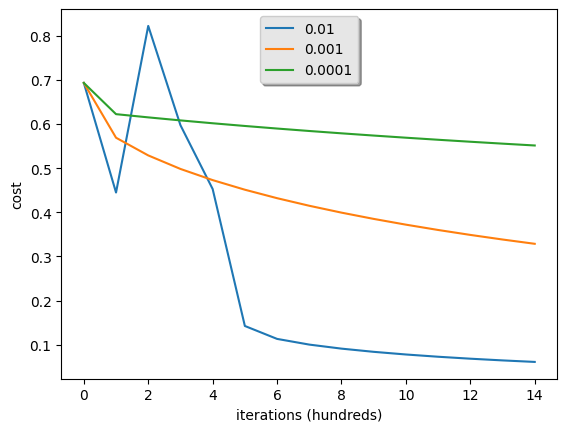

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 1.0, your algorithm predicts a "me" picture.


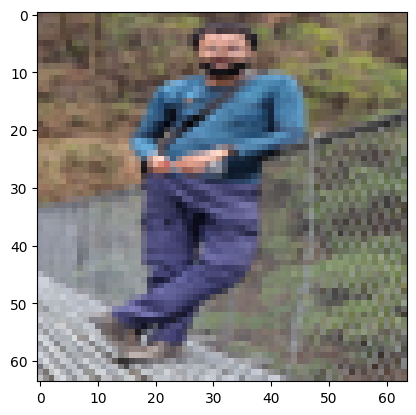

In [ ]:
# change this to the name of your image file
my_image = "test2.png"

# We preprocess the image to fit your algorithm.
fname = "/content/drive/MyDrive/dataset/image_identification/datasets/images/" + my_image
image = np.array(Image.open(fname).resize((64, 64)))

# Convert RGBA to RGB
image = image[:,:,:3] # Select first 3 channels (RGB)

plt.imshow(image)
image = image / 255.
image = image.reshape((1, 64 * 64 * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

# Ensure the 'classes' variable is defined and accessible in the current scope

classes = ['not me', 'me'] # Example class names - replace with your actual class names

# You may need to reload or rerun the cell where 'classes' is defined
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image))] +  "\" picture.") # Removed .item().decode("utf-8") as classes may already contain strings